In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import math
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
#from keras.utils.vis_utils import plot_model

In [2]:
#importing needed packages and files
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
file_path = '/content/drive/MyDrive/winequalityN.csv'
print(file_path)

Mounted at /content/drive
/content/drive/MyDrive/winequalityN.csv


In [3]:
# Read in data
wine_data = pd.read_csv(file_path)
wine_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# Show number of empty spaces in data set
wine_data.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [5]:
# Delete empty spaces in data
wine_data = wine_data.dropna()
wine_data.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# Rename "type" to "white_wine"
wine_data.rename(columns={"type": "white_wine"},
                          inplace=True)
wine_data

<ipython-input-6-e582f8faee15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data.rename(columns={"type": "white_wine"},


,white_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
# Change data in white_wine column based on condition
wine_data.loc[wine_data["white_wine"] == "white", "white_wine"] = 1
wine_data.loc[wine_data["white_wine"] == "red", "white_wine"] = 0
wine_data

,white_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
# Change the quality value based on condition
wine_data.loc[wine_data["quality"] <= 6, "quality"] = 0 # bad wine
wine_data.loc[wine_data["quality"] >= 7, "quality"] = 1 # good wine
wine_data

,white_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,0
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [9]:
# Check how many good wines are in data set
(wine_data['quality'] == 1).sum()

1271

In [10]:
# Normalize data
# this will convert all values into a number between 0-1 without losing it's weight/importance
ct  = make_column_transformer(
    (MinMaxScaler(), ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol",]) # columns to be normalized
)

In [11]:
# Seperate features and labels
X = wine_data.drop("quality", axis=1) # features: everything that is not the target value
y = wine_data["quality"] # label: the target value
X

,white_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [12]:
# Split into Training and Test data sets
# standard training amount: 80% of data
# standard testing amount: 20% of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=66)

In [13]:
# Transform training data
ct.fit(X_train)

# Apply normalization to training and test data (MinMaxScaler)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [14]:
X_train_normal

array([[0.21487603, 0.11333333, 0.22289157, ..., 0.34645669, 0.1011236 ,
        0.44927536],
       [0.23966942, 0.12666667, 0.18674699, ..., 0.40944882, 0.19101124,
        0.23188406],
       [0.63636364, 0.15333333, 0.30722892, ..., 0.22834646, 0.3988764 ,
        0.26086957],
       ...,
       [0.27272727, 0.12      , 0.20481928, ..., 0.25984252, 0.1741573 ,
        0.15942029],
       [0.18181818, 0.08      , 0.14457831, ..., 0.4488189 , 0.14044944,
        0.50724638],
       [0.30578512, 0.07333333, 0.20481928, ..., 0.28346457, 0.15168539,
        0.44927536]])

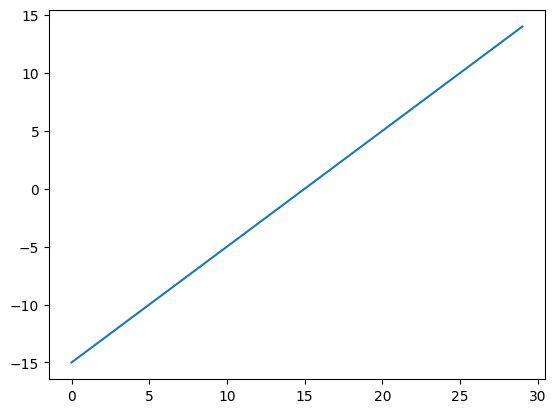

In [15]:
# Demonstrations of different activation functions

# Create a sample tensor with values from -15 to 15
samp_ten = tf.cast(tf.range(-15, 15), tf.float32)
plt.plot(samp_ten)

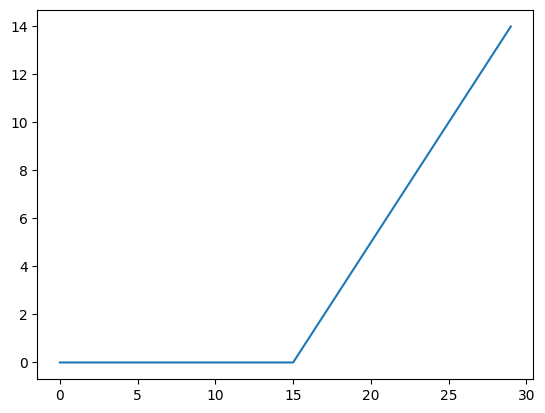

In [16]:
#ReLU

# Turn negative values to zero and other wise leave them as they are
def relu(x):
  return tf.maximum(0, x)

# Pass toy tensor to our relu function
plt.plot(relu(samp_ten))

# When our models are given non-linear functions, it's able to find patterns in
# non-linear data (NN use linear and non-linear activations to find patterns in data)
# Now we can draw patterns that are curved and bent

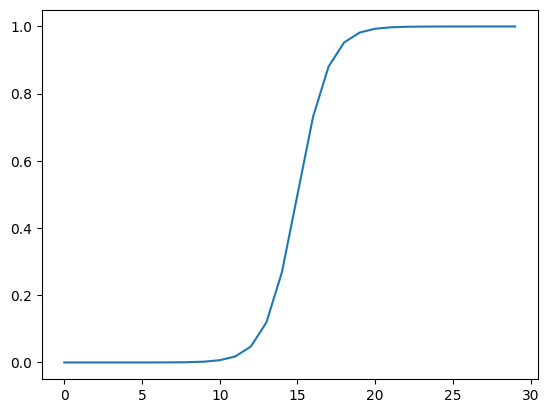

In [17]:
# Sigmoid

#sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# This allows us to draw non-straight lines
plt.plot(sigmoid(samp_ten))

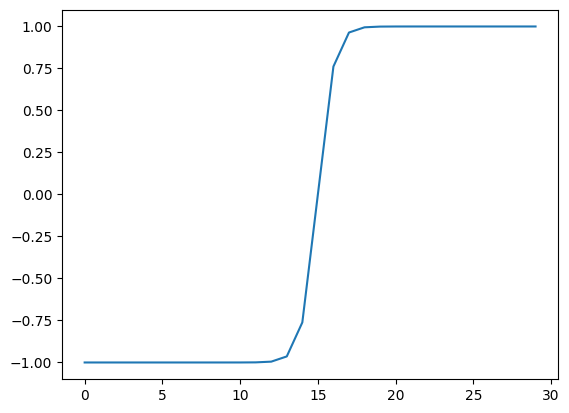

In [18]:
# Tanh

def tanh(x):
  return tf.tanh(x)

# Allows for a mix of linear and curved lines
plt.plot(tanh(samp_ten))

In [19]:
# Build model!

# Set random seed
tf.random.set_seed(66)

# Create the model
# activation funtions: help the network decide what is important data
#    they recieve data, add weights and baises, and pass the result to the next hidden layer
#    depending on the error value, the weights are updated
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # output layer, 1 neuron, sigmoid activation
])
# Sequential Neural Network: layers are arranged sequentially, therefore each layer feeds into the next one in a linear fashion
#    feedforward: data flows in only the forward direction, no cycles, loops, or backwards passes

# Compile the model
#    calculates errors, optimize, evaluate
# Loss: finds the average of the errors between predictins and observed data (how wrong are our predictions)
# Adam: optimizes our predictions by adjusting the weights and baises to minimize the loss function during training
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Fit the model
#    take the data and fit it on the model over 100 tries to create a trained model
# epoch: a full iteration over the training data
history = model.fit(X_train_normal, y_train, epochs=100)

# The features passed are then converted into a 4 value vector, meaning 4 sets of features to represent each neuron
#    in the layer
# That vector is then turned into an additional optimized vector via the optimizer function
# Those are then converted into a prediction of either a good or bad wine

Epoch 1/100
162/162 [==============================] - 3s 5ms/step - loss: 1.6201 - accuracy: 0.8056
Epoch 2/100
162/162 [==============================] - 1s 5ms/step - loss: 0.4598 - accuracy: 0.8056
Epoch 3/100
162/162 [==============================] - 1s 5ms/step - loss: 0.4342 - accuracy: 0.8056
Epoch 4/100
162/162 [==============================] - 1s 5ms/step - loss: 0.4159 - accuracy: 0.8054
Epoch 5/100
162/162 [==============================] - 1s 5ms/step - loss: 0.4084 - accuracy: 0.8068
Epoch 6/100
162/162 [==============================] - 0s 3ms/step - loss: 0.4038 - accuracy: 0.8124
Epoch 7/100
162/162 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8126
Epoch 8/100
162/162 [==============================] - 0s 2ms/step - loss: 0.3992 - accuracy: 0.8143
Epoch 9/100
162/162 [==============================] - 0s 2ms/step - loss: 0.3988 - accuracy: 0.8176
Epoch 10/100
162/162 [==============================] - 0s 2ms/step - loss: 0.3977 - accura

In [20]:
# Evaluate model on accuracy
model.evaluate(X_train_normal, y_train)

# How to improve the model:
#   increase num of neurons or layers
#   add weightings to get desired outputs
#   try different activation functions
#   try different optimizer fucntions
#   increase learning rate
#   increase number of epochs

162/162 [==============================] - 0s 2ms/step - loss: 0.3802 - accuracy: 0.8294


[0.3802065849304199, 0.829400360584259]

<Axes: >

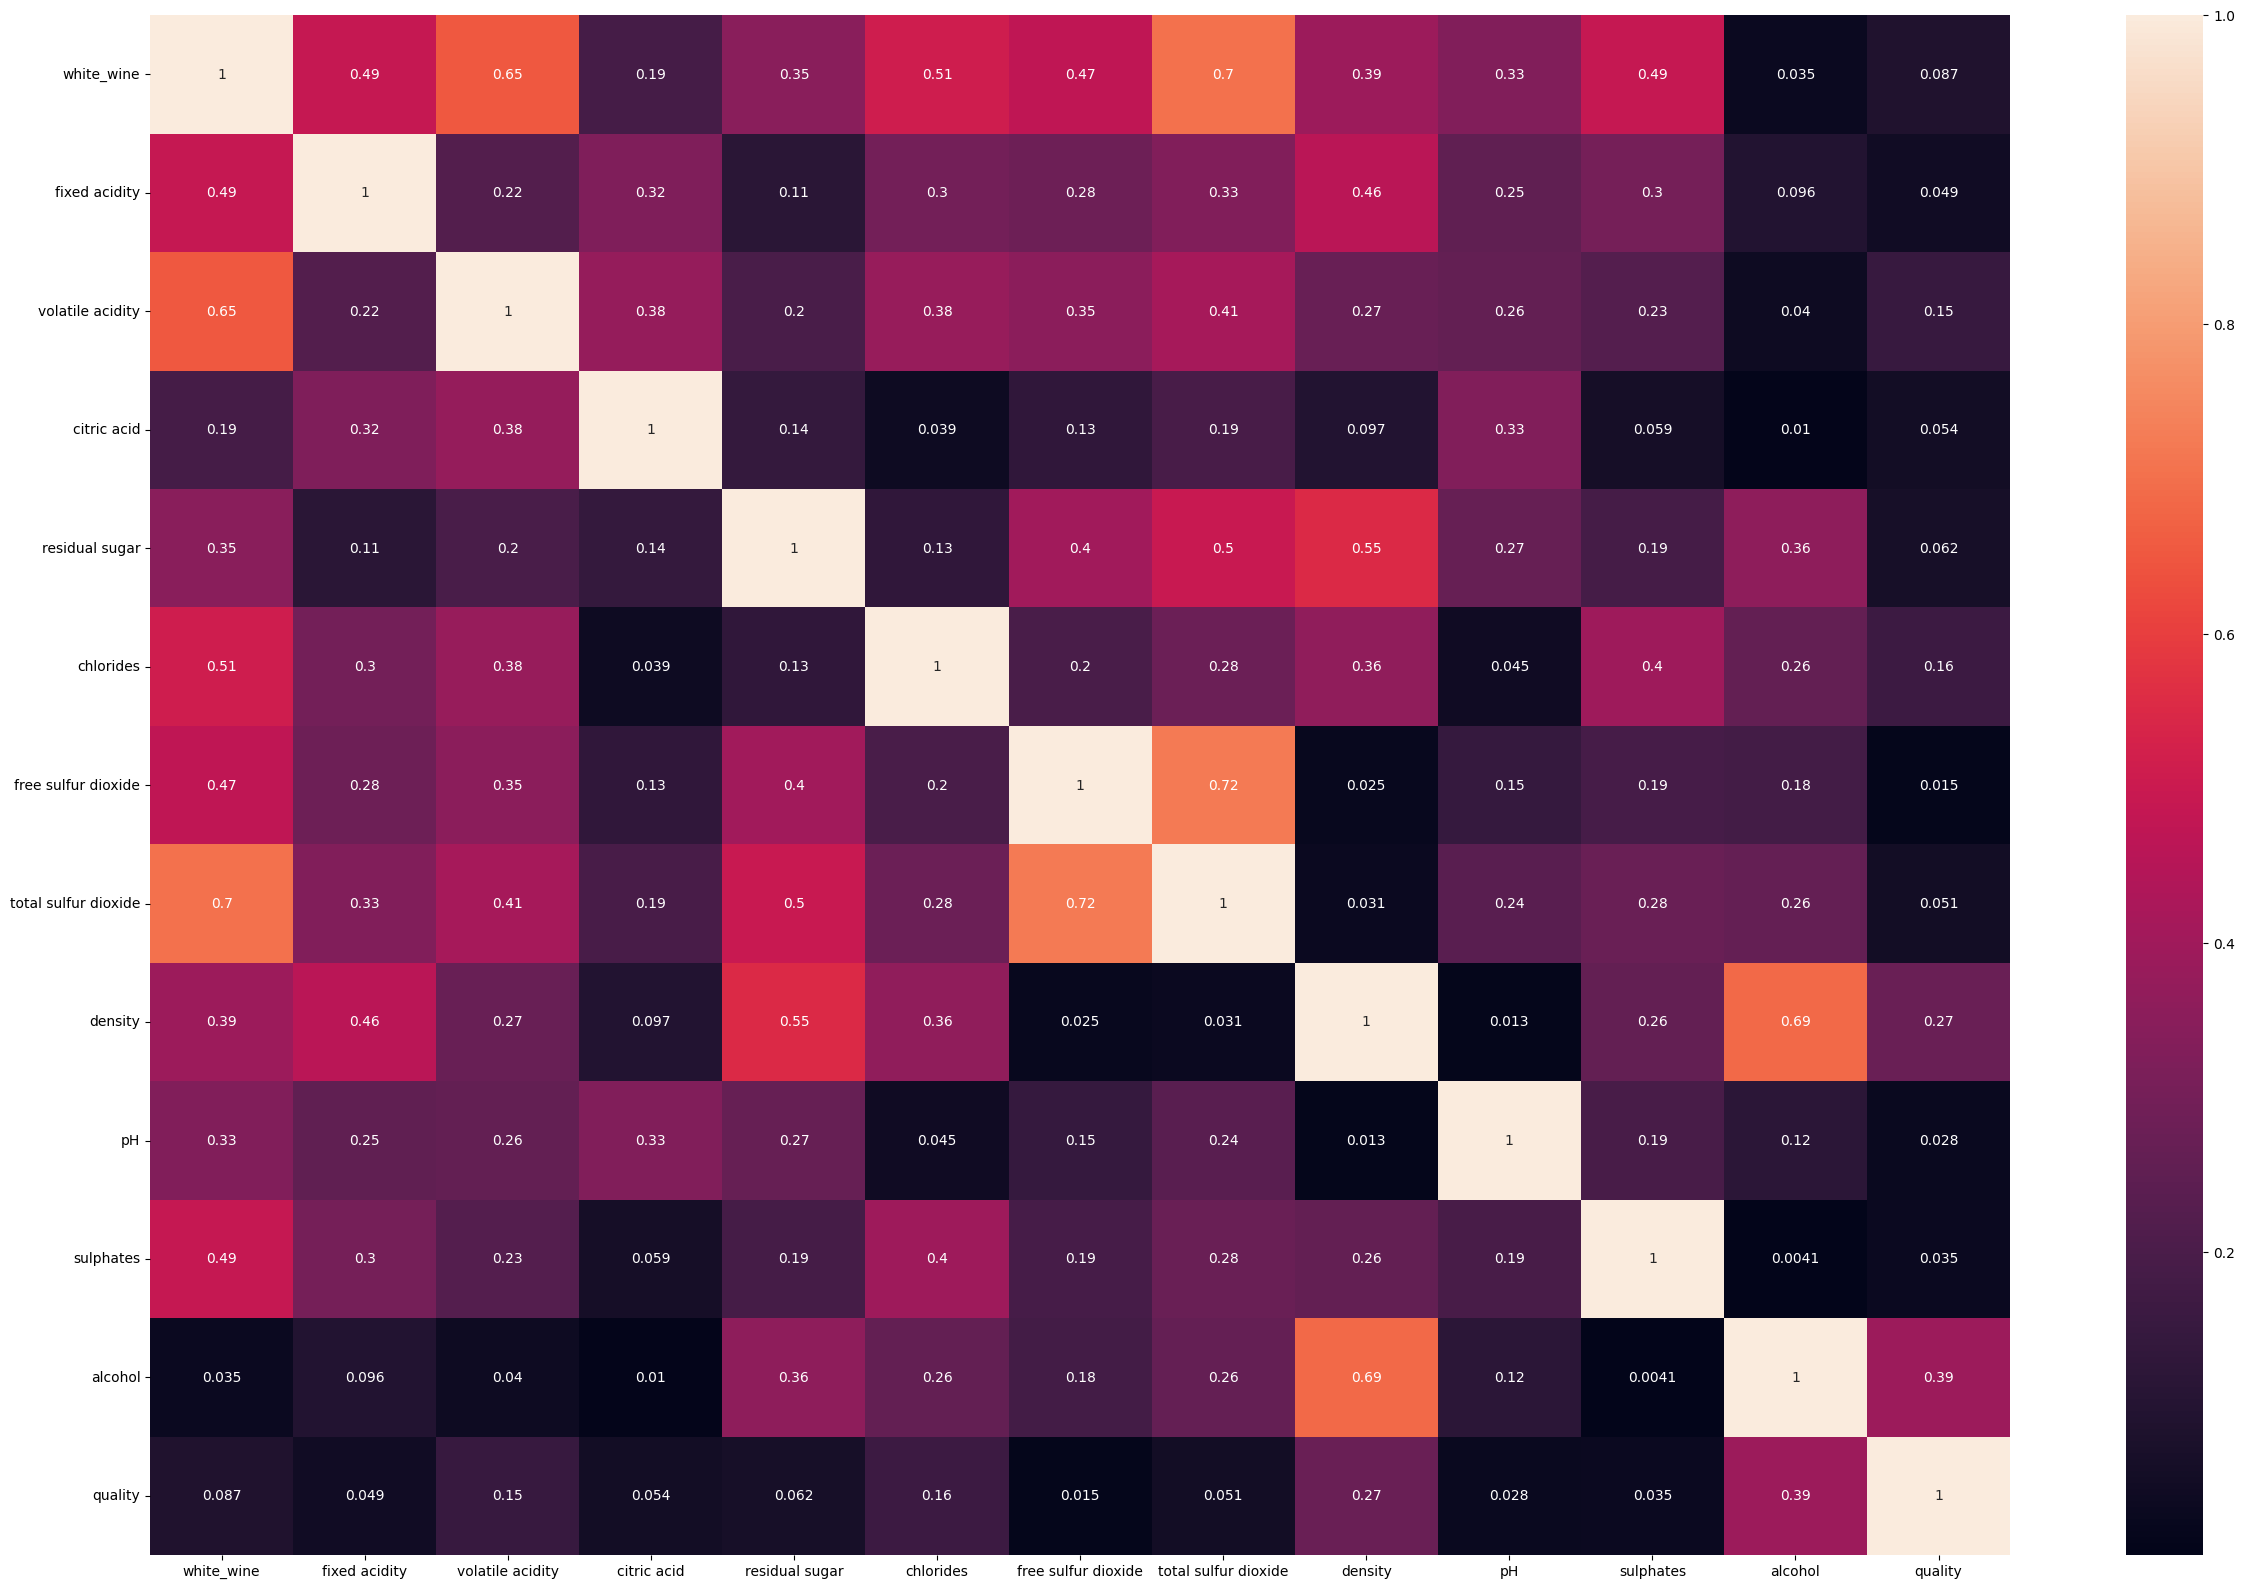

In [21]:
# Correlation matrix
#   when we say data is correlated, it means the data is related to each other. When a feature moves in a
#   certain direction a label also tends to move in that same direction
plt.figure(figsize=(30,20))
sns.heatmap(wine_data.corr().abs(), annot=True)

Text(0.5, 1.0, 'Model Loss Curve')

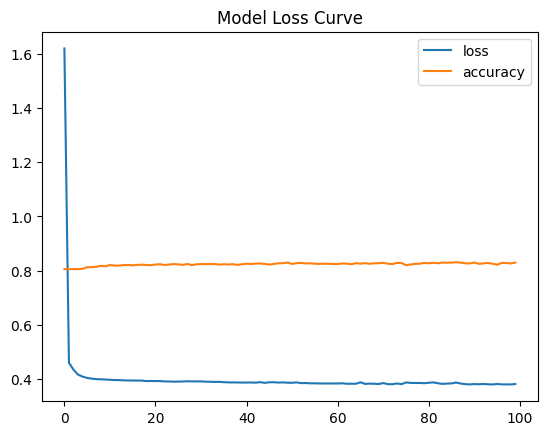

In [22]:
# Plot loss curve
pd.DataFrame(history.history).plot()
plt.title("Model Loss Curve")

In [23]:
# Find ideal learning rate using a callback
#    callback will train a duplicate model and increase the learning rate each epoch to find best rate
# learning rate: how quickly you want the model to close the gap between where it is and the goal
#    too high, you will go past the target; to low, you won't reach the target

tf.random.set_seed(66)

model_learning_rate = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),
])
model_learning_rate.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# schedular: gives Adam the updated learning rate after each epoch
schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # commonly done/used numbers

history_learning_rate = model_learning_rate.fit(X_train_normal, y_train, epochs=100,
                                                callbacks=[schedular]) # note: you can have multiple callbacks

Epoch 1/100
162/162 [==============================] - 2s 3ms/step - loss: 2.7793 - accuracy: 0.8056 - lr: 1.0000e-04
Epoch 2/100
162/162 [==============================] - 0s 3ms/step - loss: 2.6324 - accuracy: 0.8056 - lr: 1.1220e-04
Epoch 3/100
162/162 [==============================] - 1s 3ms/step - loss: 1.5059 - accuracy: 0.8056 - lr: 1.2589e-04
Epoch 4/100
162/162 [==============================] - 1s 4ms/step - loss: 0.7244 - accuracy: 0.8056 - lr: 1.4125e-04
Epoch 5/100
162/162 [==============================] - 1s 4ms/step - loss: 0.6692 - accuracy: 0.8056 - lr: 1.5849e-04
Epoch 6/100
162/162 [==============================] - 1s 4ms/step - loss: 0.6334 - accuracy: 0.8056 - lr: 1.7783e-04
Epoch 7/100
162/162 [==============================] - 0s 3ms/step - loss: 0.6060 - accuracy: 0.8056 - lr: 1.9953e-04
Epoch 8/100
162/162 [==============================] - 0s 2ms/step - loss: 0.5834 - accuracy: 0.8056 - lr: 2.2387e-04
Epoch 9/100
162/162 [==============================] - 0

Text(0.5, 1.0, 'Learning rate vs Loss')

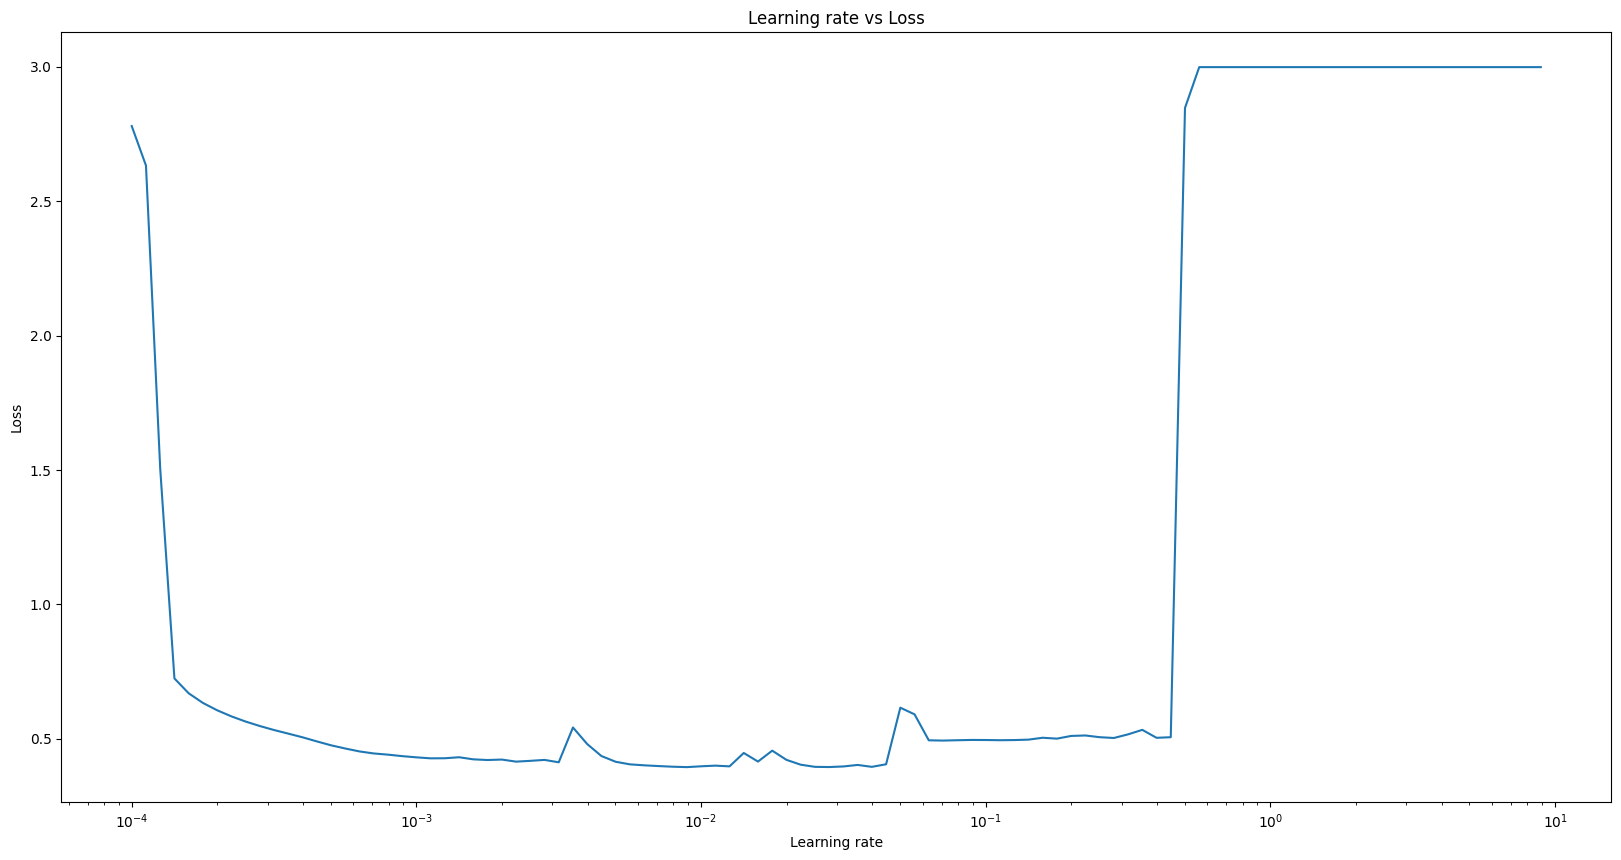

In [24]:
# Plot learning rate vs the loss
#   the best learning rate will be the lowest point on the graph
# defualt learning rate with Adam: 0.01
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(20,10))
plt.semilogx(lrs, history_learning_rate.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [25]:
# Evaluate with test data
loss, acc = model.evaluate(X_test_normal, y_test)
print(f"Model Loss (Test Set) : {loss}")
print(f"Model Accuracy (Test Set) : {acc}")

41/41 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.8090
Model Loss (Test Set) : 0.4156014919281006
Model Accuracy (Test Set) : 0.8089714050292969


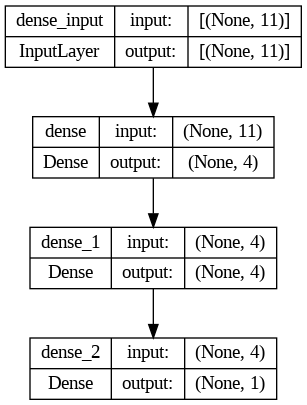

In [26]:
# Understanding the model
#   each hidden layer is going to try and find patterns and feed those results to our next layer
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

# The Model
#   it's getting 11 features passed to it, creating a vector of 4, passing it onto the next layer
#   when a layer receives the inputs, it applies weights and baises to each neuron

In [27]:
# Weights: determine the strength and direction of the connection between neurons
#   they multiply the input data and influence the activation of the subsequent neurons
#   represented by a matrix: N num of input neurons and M num of output neurons = N * M
weights, biases = model.layers[1].get_weights()
weights, weights.shape

(array([[-1.4755421 , -0.765632  ,  0.0862243 , -0.27360144],
        [ 0.43180722, -0.19992071, -0.5958048 ,  0.6293445 ],
        [-0.5993209 , -0.16796452, -1.257981  ,  0.9437558 ],
        [ 1.0276036 , -0.15378064,  0.6261173 , -0.7089397 ]],
       dtype=float32),
 (4, 4))

In [28]:
# Biases: defines how much the patterns in the weights tensor should influence the next layer
#   allow the activation of neurons to be shifted to the left or right, helps the model fit data better
#   represented by a vector: list of numbers essentially
biases, biases.shape

(array([-0.018853  ,  0.        ,  0.03593395,  0.03361792], dtype=float32),
 (4,))